# RNSA Breast Cancer Detector:

### ***Informacion del Dataset***

- `site_id` -> Identificador del centro donde se hizo la mamografia.

- `patient_id`-> Identificador del paciente.

- `image_id` -> Identificador de la mamografia.

- `laterality`-> Seno del cual se hizo la mamografia.

- `view`-> Plano con el cual se hizo la mamografia. Hay 6 planos posibles pero solo tenemos muestras de los 2 siguientes:
    - CC: Crano-Caudal.
    - MLO: Medio Lateral Oblicuo.

- `age`-> Edad de la paciente.

- `CANCER` -> El Target del dataset.

- `biopsy`-> Informa sobre si la paciente se ha sometido o no a una biopsia.

- `invasive` -> Informa sobre si el cancer se ha expandido a tejido sano dentro del seno.

- `BI-RADS`: (Sistema de Informe y Registro de Imágenes Mamarias) Escala de 0-6 para determinar la posibilidad de cancer maligno con los resultados de la mamografia.
    - 0 : No concluyente.
    - 1 : Mama normal.
    - 2 : Hallazgos benignos.
    - 3 : Hallazgos posiblemente benignos.
    - 4 : Anormalidad sospechosa.
    - 5 : Hallazgos posiblemente malignos.
    - 6 : Lesión maligna demostrada.

- `implant` -> Informa si la paciente tiene un implante en el seno.

- `density` -> Densidad del tejido mamario.

- `machine_id` -> Identificador del equipo que realizo la mamografia.

- `difficult_negative_case` -> Mamografias que han sido etiquetadas como dificil de interpretar.

**Librerias**

In [2]:
# Librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer


## Carga de datos

In [3]:
#Vamos a crear un bloque de comprobación para asegurar que los datos se cargan sin problema.

def GetData():
    print("Loading data...\n==========\n")
    try:
        data_train = pd.read_csv("../data/raw/train.csv")
        print("· Train data loaded")
    except Exception as e:
        print(f"· Train data is not loaded: Exception {e}\n==========\n")
    
    try:
        data_test = pd.read_csv("../data/raw/test.csv")
        print("· Train data is loaded")
    except Exception as e:
        print(f"· Test data is not loaded: Exception {e}\n==========\n")

    try:
        data_submision = pd.read_csv("../data/raw/sample_submission.csv")
        print("· Submission data is loaded\n==========\n")
    
    except Exception as e:
        print(f"· Submission data is not loaded: Exception {e}\n==========\n")

    return data_train, data_test, data_submision

#Desempaquetamos los Datasets si se han cargado correctamente.
try:
    dataTrain, dataTest, dataSub = GetData()
    print("...Data loaded succesfully")
except Exception as e:
    print(f"Error: {e}")

Loading data...

· Train data loaded
· Train data is loaded
· Submission data is loaded

...Data loaded succesfully


## Analisis de Datos

**Detección de los datos NaN**

In [4]:
def DataAnalysis(dataset):
    #Mostramos las dimensiones del dataset y la descripción
    print(f"Data Dimensions: {dataset.shape}\n")
    print(f"Data Description:\n==========\n{dataset.describe()}\n==========\n")

    #Creamos un filtro para obtener las columnas con valores no numericos.    
    nan_filter = dataset.isna().sum()
    data_nan = nan_filter[nan_filter > 0]

    if data_nan.empty:
        print("Non Nan Values\n")
    
    else:
        print("Nan Values:\n==========\n")
        for col, n in data_nan.items():
            print(f"Column {col}: {n} NaN values")


DataAnalysis(dataTrain)

Data Dimensions: (54706, 14)

Data Description:
            site_id    patient_id      image_id           age        cancer  \
count  54706.000000  54706.000000  5.470600e+04  54669.000000  54706.000000   
mean       1.460407  32698.865262  1.079386e+09     58.543928      0.021168   
std        0.498434  18893.861534  6.183269e+08     10.050884      0.143944   
min        1.000000      5.000000  6.849100e+04     26.000000      0.000000   
25%        1.000000  16481.000000  5.458153e+08     51.000000      0.000000   
50%        1.000000  32432.000000  1.082689e+09     59.000000      0.000000   
75%        2.000000  48999.000000  1.613228e+09     66.000000      0.000000   
max        2.000000  65534.000000  2.147472e+09     89.000000      1.000000   

             biopsy      invasive        BIRADS       implant    machine_id  
count  54706.000000  54706.000000  26286.000000  54706.000000  54706.000000  
mean       0.054272      0.014953      0.772350      0.026999     54.618378  
std   

Los campos `age`, `BIRADS` y `density` tienen valores nulos. vamos a limpiar los datos y tratar los nulos.

**Graficos**

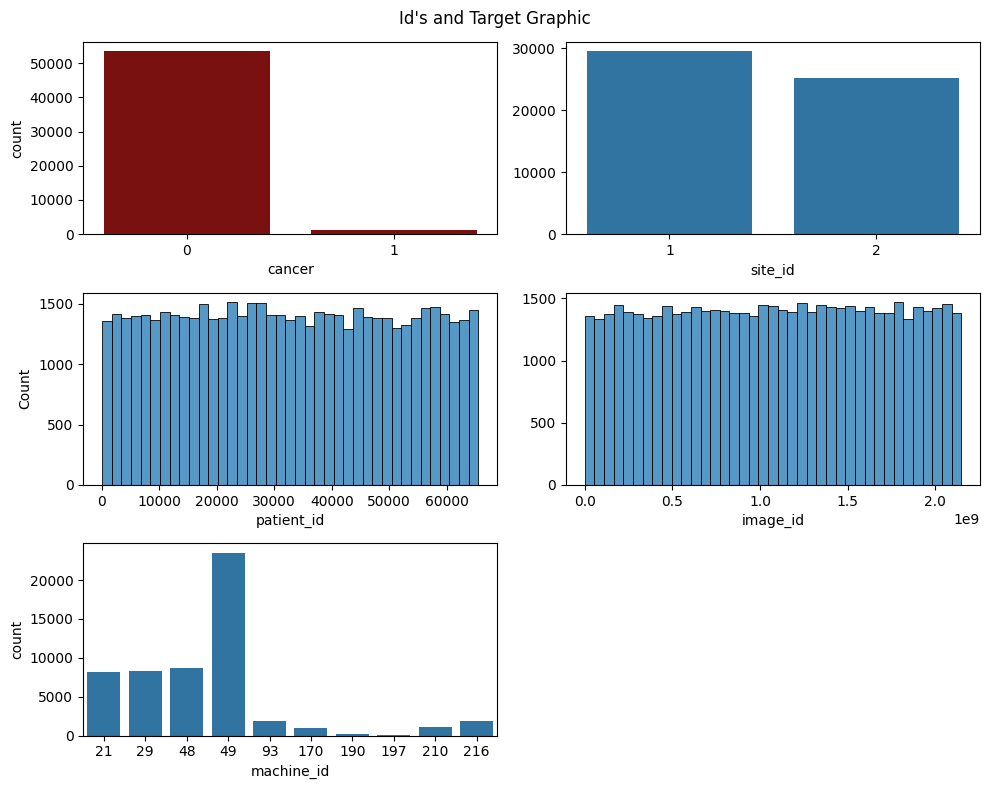

In [33]:
#Vamos a segmentar los graficos en varias figuras. El primero que tomaremos serán los identificadores y el Target.

fig, axis = plt.subplots(3,2, figsize=(10,8))

sns.countplot(dataTrain, x=dataTrain["cancer"], ax= axis[0,0], color="darkred")
sns.countplot(dataTrain, x=dataTrain["site_id"], ax=axis[0,1])
axis[0,1].set_ylabel(None)
sns.histplot(dataTrain, x=dataTrain["patient_id"], ax=axis[1,0])
sns.histplot(dataTrain, x=dataTrain["image_id"], ax=axis[1,1])
axis[1,1].set_ylabel(None)
sns.countplot(dataTrain, x=dataTrain["machine_id"], ax=axis[2,0])
axis[2,1].axis("off")

plt.suptitle("Id's and Target Graphic")

plt.tight_layout()
plt.show()

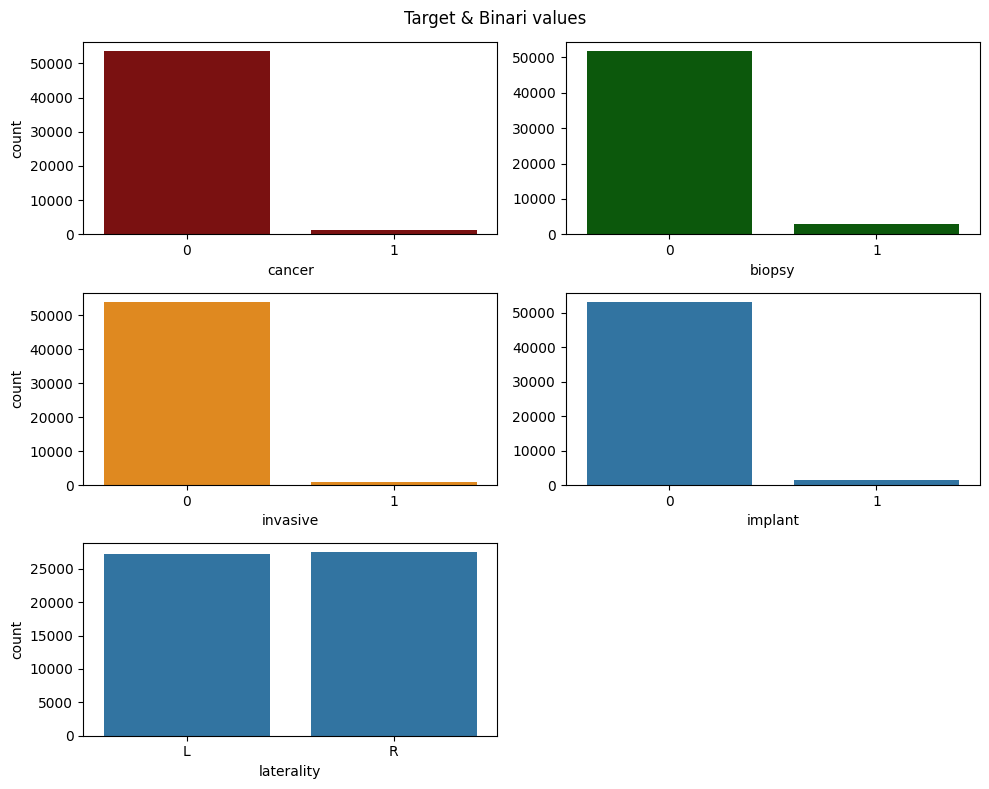

In [42]:
#El siguiente grafico será con los campos binarios

fig, axis = plt.subplots(3,2, figsize=(10,8))

sns.countplot(dataTrain, x=dataTrain["cancer"], ax= axis[0,0], color="darkred")
sns.countplot(dataTrain, x=dataTrain["biopsy"], ax=axis[0,1], color="darkgreen")
axis[0,1].set_ylabel(None)
sns.countplot(dataTrain, x=dataTrain["invasive"], ax=axis[1,0], color="darkorange")
sns.countplot(dataTrain, x=dataTrain["implant"], ax=axis[1,1])
axis[1,1].set_ylabel(None)
sns.countplot(dataTrain, x=dataTrain["laterality"], ax=axis[2,0])
axis[2,1].axis("off")

plt.suptitle("Target & Binari values")

plt.tight_layout()
plt.show()

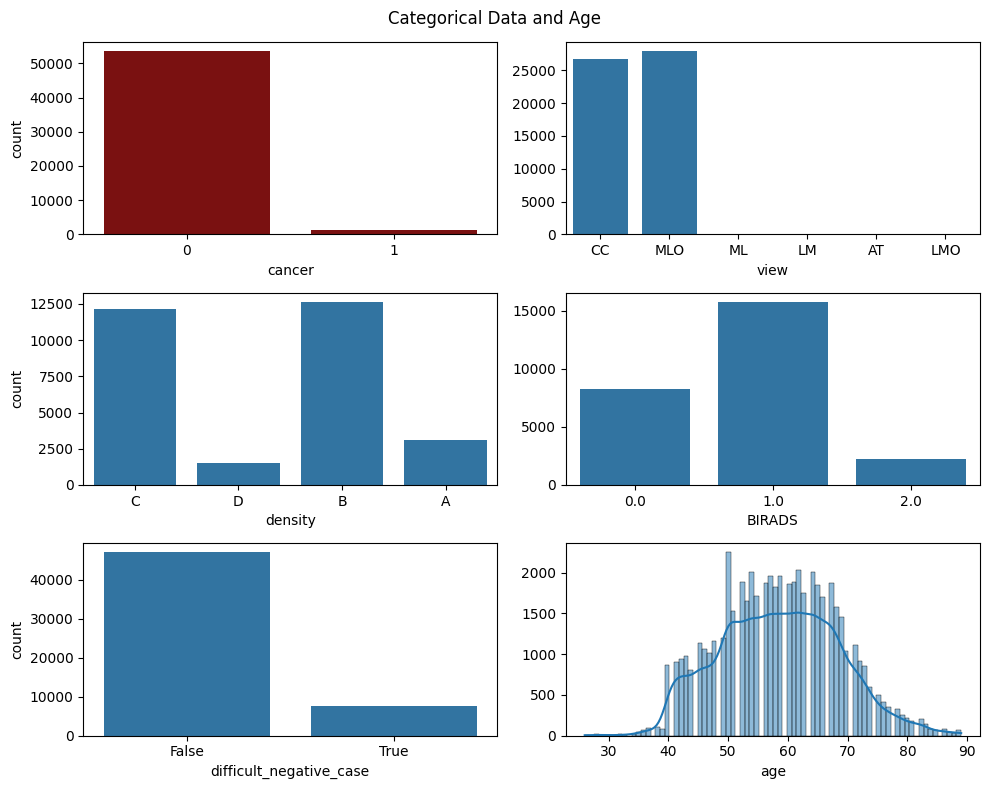

In [54]:
#Por ultimo generamos el grafico de los campos categoricos y de la edad, que es continuo.

fig, axis = plt.subplots(3,2, figsize=(10,8))

sns.countplot(dataTrain, x=dataTrain["cancer"], ax= axis[0,0], color="darkred")
sns.countplot(dataTrain, x=dataTrain["view"], ax=axis[0,1])
axis[0,1].set_ylabel(None)
sns.countplot(dataTrain, x=dataTrain["density"], ax=axis[1,0])
sns.countplot(dataTrain, x=dataTrain["BIRADS"], ax=axis[1,1])
axis[1,1].set_ylabel(None)
sns.countplot(dataTrain, x=dataTrain["difficult_negative_case"], ax=axis[2,0])
sns.histplot(dataTrain, x=dataTrain["age"], ax=axis[2,1], kde=True)
axis[2,1].set_ylabel(None)

plt.suptitle("Categorical Data and Age")

plt.tight_layout()
plt.show()

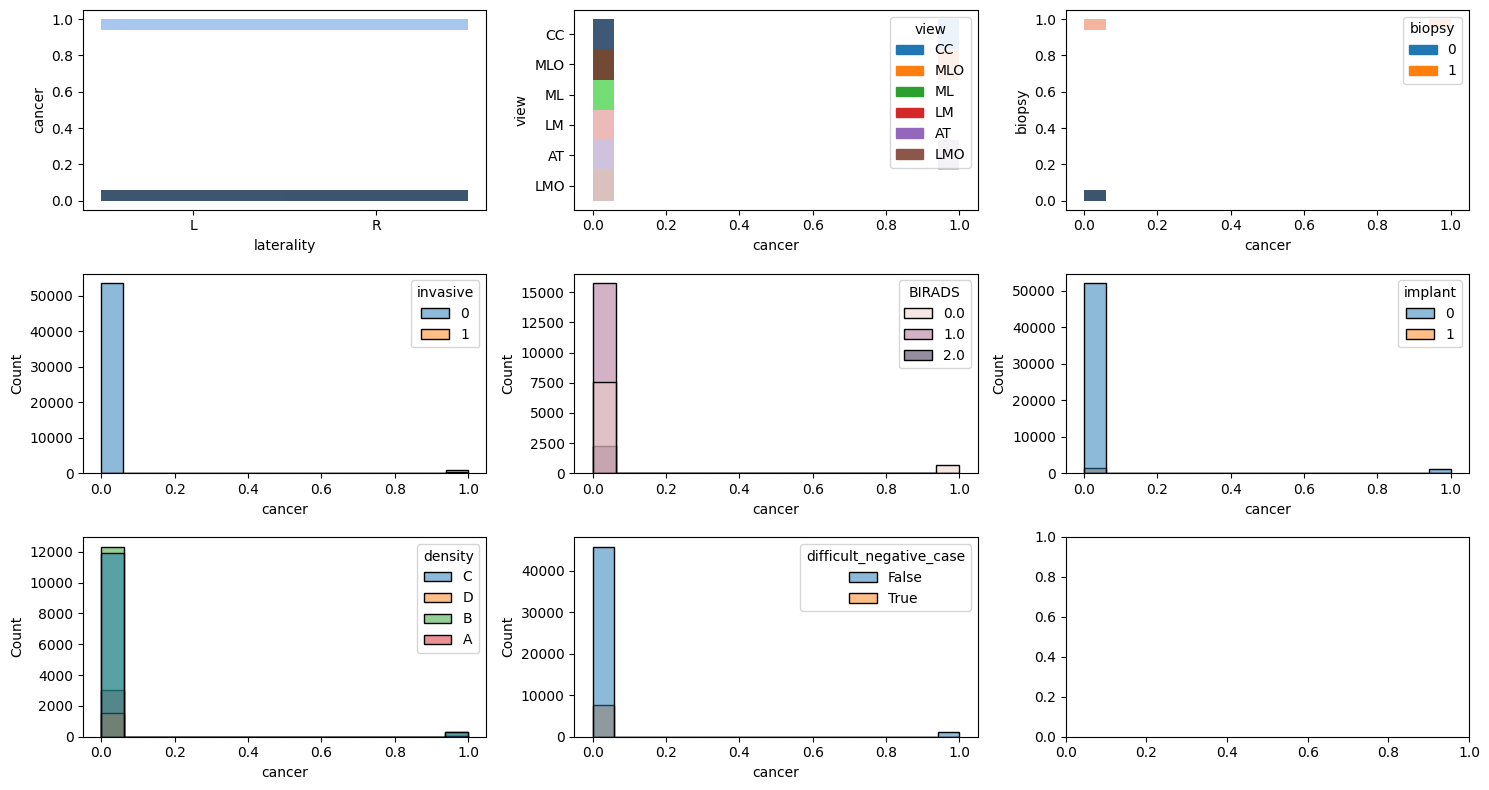

In [328]:
#Vamos a enfrentar el target con los demás campos relevantes.

fig, axis = plt.subplots(3,3, figsize=(15,8))

sns.histplot(dataTrain, x=dataTrain["laterality"], y=dataTrain["cancer"], ax=axis[0,0])
sns.histplot(dataTrain, x=dataTrain["cancer"], y=dataTrain["view"], hue=dataTrain["view"], ax=axis[0,1])
sns.histplot(dataTrain, x=dataTrain["cancer"], y=dataTrain["biopsy"], hue=dataTrain["biopsy"], ax=axis[0,2])
sns.histplot(dataTrain, x=dataTrain["cancer"], hue=dataTrain["invasive"], ax=axis[1,0])
sns.histplot(dataTrain, x=dataTrain["cancer"], hue=dataTrain["BIRADS"], ax=axis[1,1])
sns.histplot(dataTrain, x=dataTrain["cancer"], hue=dataTrain["implant"], ax=axis[1,2])
sns.histplot(dataTrain, x=dataTrain["cancer"], hue=dataTrain["density"], ax=axis[2,0])
sns.histplot(dataTrain, x=dataTrain["cancer"], hue=dataTrain["difficult_negative_case"], ax=axis[2,1])

plt.tight_layout()
plt.show()